In [1]:
#install.packages("Zelig")
#source("http://gking.harvard.edu/zelig/install.R")
#remotes::install_version("Zelig", "5.1.6")
#https://rpubs.com/Shaahin/rare_event_logit

library(Zelig)

Loading required package: survival



In [2]:
data(mid)

In [3]:
z.out1 <- zelig(conflict ~ major + contig + power + maxdem + mindem + years,
                data = mid, model = "relogit", tau = 1042/303772)

Warning message:
“`tbl_df()` was deprecated in dplyr 1.0.0.
ℹ Please use `tibble::as_tibble()` instead.
ℹ The deprecated feature was likely used in the Zelig package.
  Please report the issue at <https://github.com/IQSS/Zelig/issues>.”
Warning message:
“`group_by_()` was deprecated in dplyr 0.7.0.
ℹ Please use `group_by()` instead.
ℹ See vignette('programming') for more help
ℹ The deprecated feature was likely used in the Zelig package.
  Please report the issue at <https://github.com/IQSS/Zelig/issues>.”


How to cite this model in Zelig:
  Christine Choirat, Christopher Gandrud, James Honaker, Kosuke Imai, Gary King, and Olivia Lau. 2024.
  relogit: Rare Events Logistic Regression for Dichotomous Dependent Variables
  in Christine Choirat, Christopher Gandrud, James Honaker, Kosuke Imai, Gary King, and Olivia Lau,
  "Zelig: Everyone's Statistical Software," http://zeligproject.org/


In [4]:
summary(z.out1)


Model: 

Call:
z5$zelig(formula = conflict ~ major + contig + power + maxdem + 
    mindem + years, tau = 1042/303772, data = mid)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -7.525688   0.179685 -41.883  < 2e-16
major        2.433432   0.157561  15.444  < 2e-16
contig       4.112491   0.157650  26.086  < 2e-16
power        1.053747   0.217243   4.851 1.23e-06
maxdem       0.048431   0.010065   4.812 1.50e-06
mindem      -0.065249   0.012802  -5.097 3.45e-07
years       -0.063359   0.005705 -11.106  < 2e-16

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3979.5  on 3125  degrees of freedom
Residual deviance: 1868.5  on 3119  degrees of freedom
AIC: 1882.5

Number of Fisher Scoring iterations: 6

Next step: Use 'setx' method


In [5]:
x.out1 <- setx(z.out1)
s.out1 <- sim(z.out1, x = x.out1)
summary(s.out1)


 sim x :
 -----
ev
            mean           sd        50%        2.5%       97.5%
[1,] 0.002365663 0.0001465114 0.00236233 0.002085805 0.002664523
pv
         0     1
[1,] 0.999 0.001


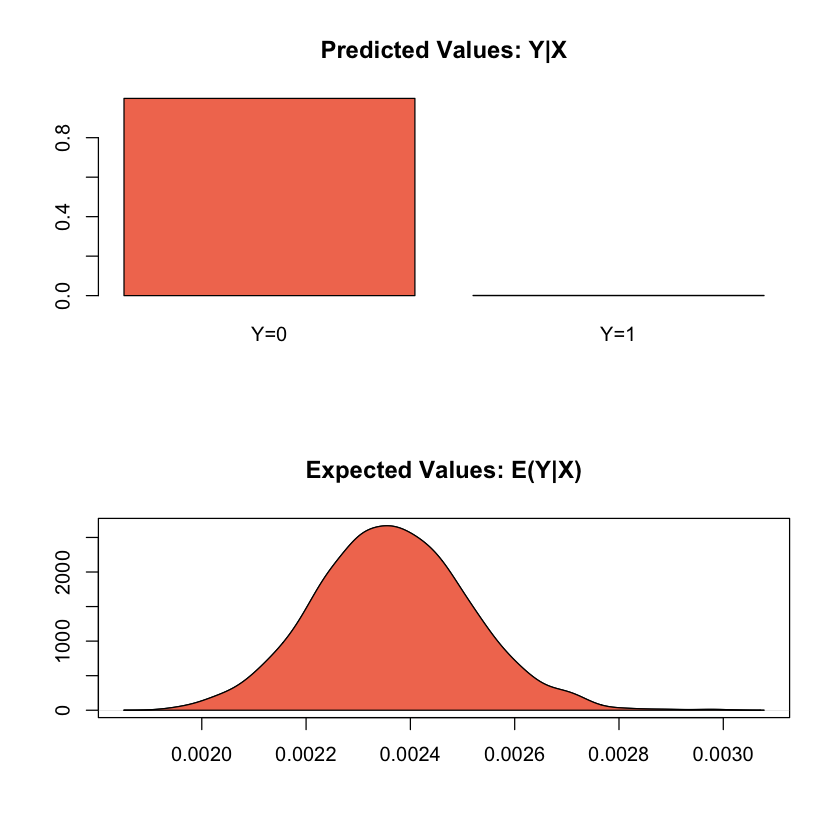

In [6]:
plot(s.out1)


In [7]:
z.out2 <- zelig(conflict ~ major + contig + power + maxdem + mindem + years,
                data = mid, model = "relogit", tau = 1042/303772,
                case.control = "weighting")

How to cite this model in Zelig:
  Christine Choirat, Christopher Gandrud, James Honaker, Kosuke Imai, Gary King, and Olivia Lau. 2024.
  relogit: Rare Events Logistic Regression for Dichotomous Dependent Variables
  in Christine Choirat, Christopher Gandrud, James Honaker, Kosuke Imai, Gary King, and Olivia Lau,
  "Zelig: Everyone's Statistical Software," http://zeligproject.org/


In [8]:
summary(z.out2)


Model: 

Call:
relogit(formula = cbind(conflict, 1 - conflict) ~ major + contig + 
    power + maxdem + mindem + years, data = as.data.frame(.), 
    tau = 0.00343020423212146, bias.correct = TRUE, case.control = "weighting")

Coefficients:
            Estimate Std. Error (robust) z value Pr(>|z|)    
(Intercept) -6.61889             0.31748 -20.848  < 2e-16 ***
major        1.67218             0.27842   6.006  1.9e-09 ***
contig       4.01640             0.22954  17.498  < 2e-16 ***
power        0.28836             0.41574   0.694 0.487925    
maxdem       0.06629             0.01925   3.444 0.000573 ***
mindem      -0.08143             0.02996  -2.718 0.006572 ** 
years       -0.11707             0.01336  -8.764  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 143.116  on 3125  degrees of freedom
Residual deviance:  91.178  on 3119  degrees of freedom
AIC: 27.041

Number of Fi

In [9]:
x.out2 <- setx(z.out2)


In [10]:
s.out2 <- sim(z.out2, x = x.out2)
summary(s.out2)

Model: 

Call:
relogit(formula = cbind(conflict, 1 - conflict) ~ major + contig + 
    power + maxdem + mindem + years, data = as.data.frame(.), 
    tau = 0.00343020423212146, bias.correct = TRUE, case.control = "weighting")

Coefficients:
            Estimate Std. Error (robust) z value Pr(>|z|)    
(Intercept) -6.61889             0.31748 -20.848  < 2e-16 ***
major        1.67218             0.27842   6.006  1.9e-09 ***
contig       4.01640             0.22954  17.498  < 2e-16 ***
power        0.28836             0.41574   0.694 0.487925    
maxdem       0.06629             0.01925   3.444 0.000573 ***
mindem      -0.08143             0.02996  -2.718 0.006572 ** 
years       -0.11707             0.01336  -8.764  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 143.116  on 3125  degrees of freedom
Residual deviance:  91.178  on 3119  degrees of freedom
AIC: 27.041

Number of Fi

In [11]:
require(knitr)
require(readr)

require(boot)
require(caTools)
require(ggplot2)
require(ROCR)
require(RColorBrewer)
require(zeligverse)
require(brglm)
require(logistf)
require(dplyr)

require(randomForest)
require(gbm)

Loading required package: knitr

Loading required package: readr

Loading required package: boot


Attaching package: ‘boot’


The following object is masked from ‘package:survival’:

    aml


Loading required package: caTools

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:Zelig’:

    stat


Loading required package: ROCR

Loading required package: RColorBrewer

Loading required package: zeligverse

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘zeligverse’”
Loading required package: brglm

Loading required package: profileModel

'brglm' will gradually be superseded by the 'brglm2' R package (https://cran.r-project.org/package=brglm2), which provides utilities for mean and median bias reduction for all GLMs.
 Methods for the detection of separation and infinite estimates in binomial-response models are provided by the 'detectseparation

In [12]:
url <- "https://d37djvu3ytnwxt.cloudfront.net/assets/courseware/v1/7022cf016eefb6d3747447589423dab0/asset-v1:MITx+15.071x_3+1T2016+type@asset+block/framingham.csv"


In [13]:
dataset <- read_csv(file = url,col_types = list(
        male = col_logical(),
        age = col_integer(),
        currentSmoker = col_logical(),
        BPMeds = col_logical(), 
        prevalentStroke = col_logical(), 
        prevalentHyp =  col_logical(), 
        diabetes = col_logical(), 
        TenYearCHD = col_logical()
      
) )

In [14]:

## Removing the instances with missing values
dataset <- dataset %>% filter(complete.cases(dataset))
dataset$education<-as.factor(dataset$education)
#dataset$education<-levels = c(1,2,3,4)
levels(dataset$education) <- c(1,2,3,4)



In [15]:
kable(head(dataset))




|male  | age|education |currentSmoker | cigsPerDay|BPMeds |prevalentStroke |prevalentHyp |diabetes | totChol| sysBP| diaBP|   BMI| heartRate| glucose|TenYearCHD |
|:-----|---:|:---------|:-------------|----------:|:------|:---------------|:------------|:--------|-------:|-----:|-----:|-----:|---------:|-------:|:----------|
|TRUE  |  39|4         |FALSE         |          0|FALSE  |FALSE           |FALSE        |FALSE    |     195| 106.0|    70| 26.97|        80|      77|FALSE      |
|FALSE |  46|2         |FALSE         |          0|FALSE  |FALSE           |FALSE        |FALSE    |     250| 121.0|    81| 28.73|        95|      76|FALSE      |
|TRUE  |  48|1         |TRUE          |         20|FALSE  |FALSE           |FALSE        |FALSE    |     245| 127.5|    80| 25.34|        75|      70|FALSE      |
|FALSE |  61|3         |TRUE          |         30|FALSE  |FALSE           |TRUE         |FALSE    |     225| 150.0|    95| 28.58|        65|     103|TRUE       |
|FALSE |  46|3      

In [16]:
## the number of success and failures
table(dataset$TenYearCHD)


FALSE  TRUE 
 3101   557 

In [17]:
set.seed(7)

logit_model <- glm(formula = TenYearCHD ~ . , data = dataset , family = binomial )

logit_pred <- predict(object = logit_model , newdata = dataset , type = "response")

conf_mat <- table( dataset$TenYearCHD,logit_pred>0.5)

## Accuracy
(conf_mat[1,1]+conf_mat[2,2])/sum(conf_mat)

[1] 0.8556588

In [18]:
## misclasification error 
1-(conf_mat[1,1]+conf_mat[2,2])/sum(conf_mat)

[1] 0.1443412

In [19]:
## sensitivity
sen <- conf_mat[2,2]/sum(conf_mat[2,])
sen

[1] 0.08617594

In [20]:
## specificity 
spec <- conf_mat[1,1]/sum(conf_mat[1,])
spec

[1] 0.9938729

In [21]:
## precision
prec <- conf_mat[2,2]/sum(conf_mat[,2])
prec 

[1] 0.7164179

In [22]:
## F1 
F1 <- (2*prec * sen)/(prec+sen)
F1


[1] 0.1538462

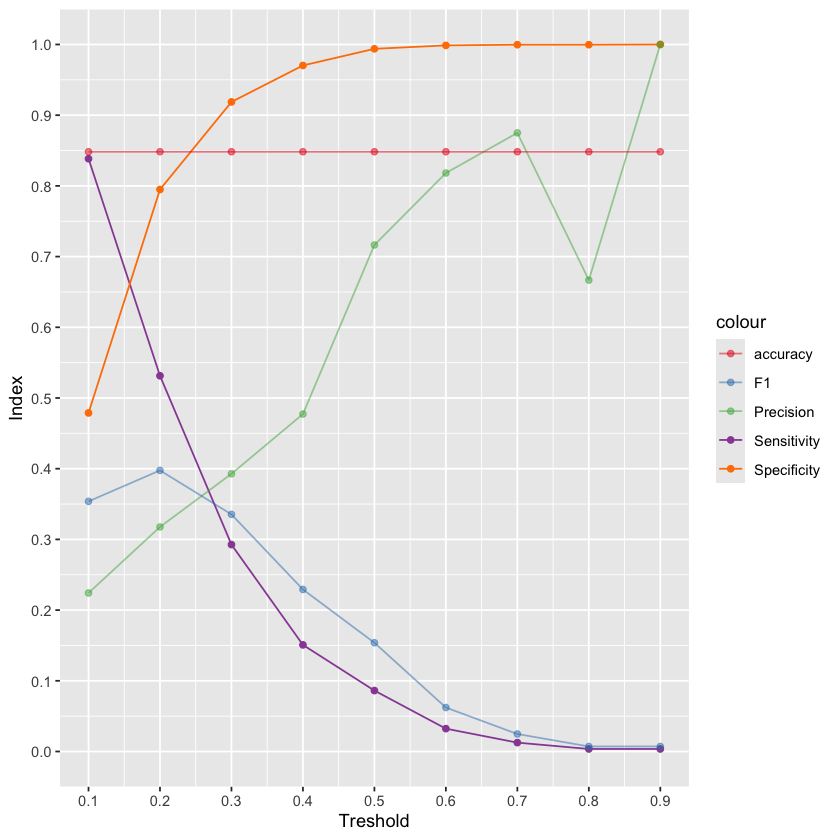

In [23]:
t_seq <- seq(0.1,0.9,by = 0.1)
index_mat <- matrix(ncol = 6 , nrow = length(t_seq))

counter <- 0 
for (treshold in t_seq ) {
        counter <- counter + 1 
       conf_mat <- table( dataset$TenYearCHD , logit_pred>treshold) 
       sen <- conf_mat[2,2]/sum(conf_mat[2,])
       spec <- conf_mat[1,1]/sum(conf_mat[1,])
       prec <- conf_mat[2,2]/sum(conf_mat[,2])
       F1 <- (2*prec * sen)/(prec+sen)
       accuracy <- (conf_mat[1,1]+conf_mat[2,2])/sum(conf_mat)
       index_mat[counter,] <-  c(treshold,sen,spec,prec,F1,accuracy  )
      
       
       
        
}

index_df <- data.frame(index_mat)
colnames(index_df) <- c("treshold","sensitivity","specificity","precision","F1")


ggplot(data = index_df) +
        geom_line(aes(x = treshold, y = sensitivity, color = "Sensitivity")  ) +
        geom_point(aes(x = treshold, y = sensitivity, color = "Sensitivity")  ) +
        geom_line(aes(x = treshold, y = specificity, color = "Specificity") ) +
        geom_point(aes(x = treshold, y = specificity, color = "Specificity") ) + 
        geom_line(aes(x = treshold , y = precision, color = "Precision"), alpha = 0.5) + 
        geom_point(aes(x = treshold , y = precision, color = "Precision"), alpha = 0.5) + 
        geom_line(aes(x = treshold, y = F1, color = "F1"), alpha = 0.5) + 
        geom_point(aes(x = treshold, y = F1, color = "F1"), alpha = 0.5) + 
        geom_line(aes(x = treshold, y = accuracy, color = "accuracy"), alpha = 0.5) + 
        geom_point(aes(x = treshold, y = accuracy, color = "accuracy"), alpha = 0.5) + 
        scale_x_continuous(name="Treshold", limits=c(0.1, 0.9), breaks = t_seq) + 
        scale_y_continuous(name = "Index", limits = c(0,1), breaks = seq(0,1,0.1)) +
        scale_color_brewer(palette = "Set1") 

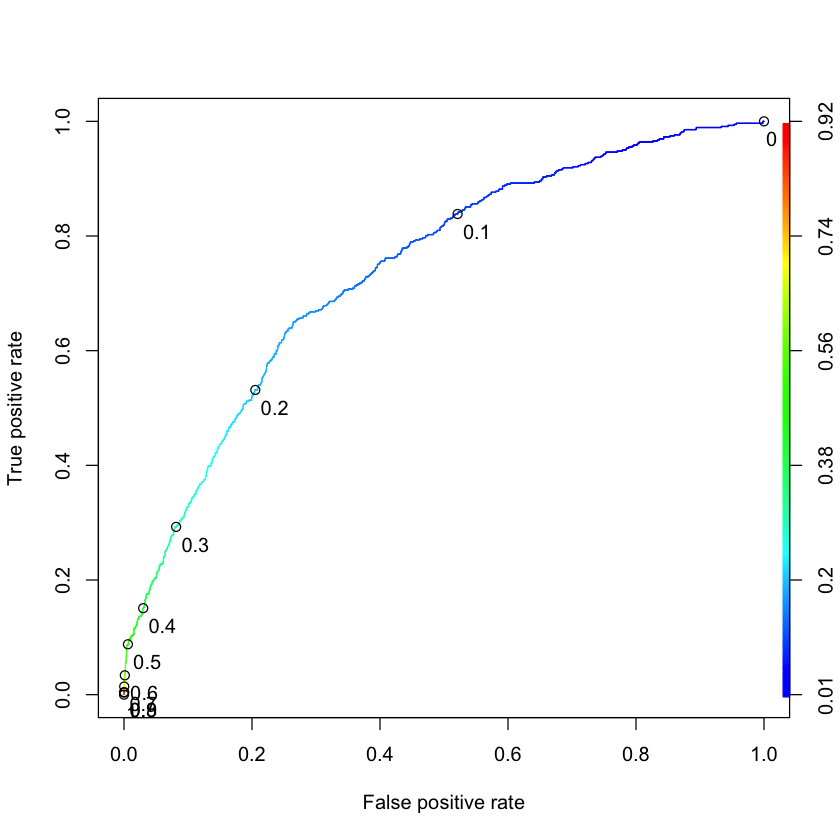

In [24]:
perf <- performance(prediction(predictions = logit_pred,labels = dataset$TenYearCHD),"tpr","fpr")
plot(perf,colorize = TRUE, print.cutoffs.at= seq(0,1,0.1), text.adj=c(-0.2,1.7))


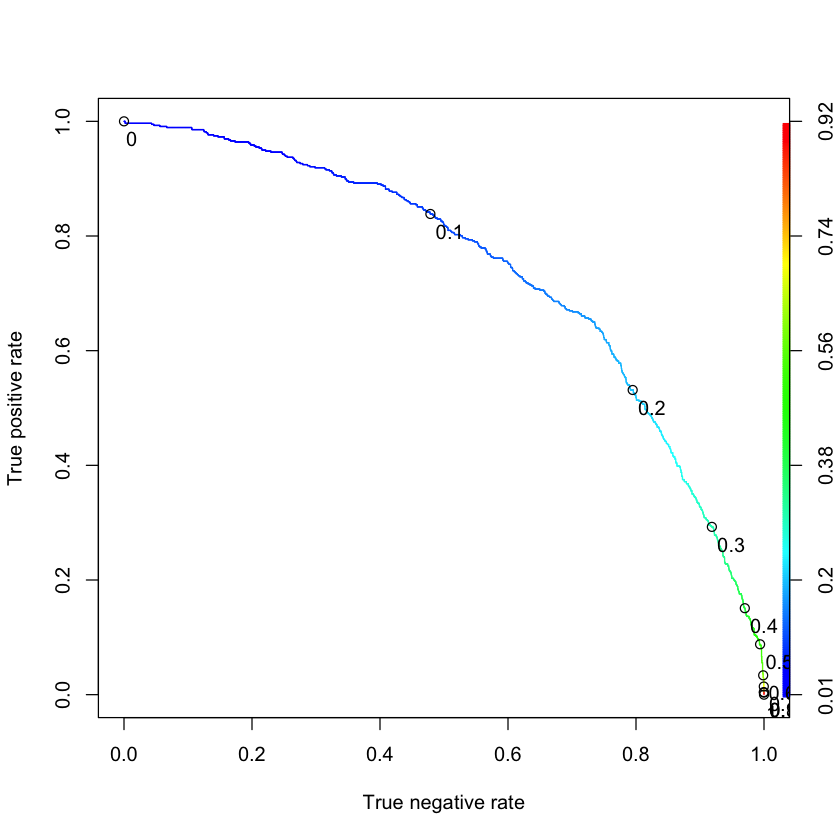

In [25]:
perf <- performance(prediction(predictions = logit_pred,labels = dataset$TenYearCHD),"tpr","tnr")
plot(perf,colorize = TRUE, print.cutoffs.at= seq(0,1,0.1), text.adj=c(-0.2,1.7))

In [26]:
set.seed(9)
split_vec <- sample.split(Y = dataset$TenYearCHD , SplitRatio = 0.8)
train <- dataset %>% filter(split_vec == TRUE)
test <- dataset %>% filter(split_vec == FALSE )

## number of instances in the training sample
nrow(train)

[1] 2927

In [27]:
## number of instances in the test sample
nrow(test)

[1] 731

In [28]:
## success proportion in training set 
train %>% dplyr::select(TenYearCHD) %>% summarise( sum(train$TenYearCHD==TRUE)/nrow(train))

sum(train$TenYearCHD == TRUE)/nrow(train)
<dbl>
0.1523744


In [29]:
## success proportion in test set 
test %>% dplyr::select(TenYearCHD) %>% summarise( sum(test$TenYearCHD==TRUE)/nrow(test))

sum(test$TenYearCHD == TRUE)/nrow(test)
<dbl>
0.1518468


In [30]:
logit_train <- glm(formula = TenYearCHD ~ . , data = train , family = "binomial")

test_pred <- predict(object = logit_train, newdata = test, type = "response")

## having a look at the success/failure of the test set
table(test$TenYearCHD)


FALSE  TRUE 
  620   111 

In [31]:
## confusion matrix
table(test$TenYearCHD,test_pred>0.5)

       
        FALSE TRUE
  FALSE   614    6
  TRUE     99   12

In [32]:
t_seq <- seq(0.1,0.9,by = 0.1)
index_mat <- matrix(ncol = 6 , nrow = length(t_seq))

counter <- 0 
for (treshold in t_seq ) {
        counter <- counter + 1 
       conf_mat <- table( test$TenYearCHD , factor(test_pred>treshold, levels = c("FALSE","TRUE"))) 
       sen <- conf_mat[2,2]/sum(conf_mat[2,])
       spec <- conf_mat[1,1]/sum(conf_mat[1,])
       prec <- conf_mat[2,2]/sum(conf_mat[,2])
       F1 <- (2*prec * sen)/(prec+sen)
       accuracy <- (conf_mat[1,1]+conf_mat[2,2])/sum(conf_mat)
       index_mat[counter,] <-  c(treshold,sen,spec,prec,F1,accuracy  )
       
       
        
}

index_df <- data.frame(index_mat)
colnames(index_df) <- c("treshold","sensitivity","specificity","precision","F1","accuracy")


Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


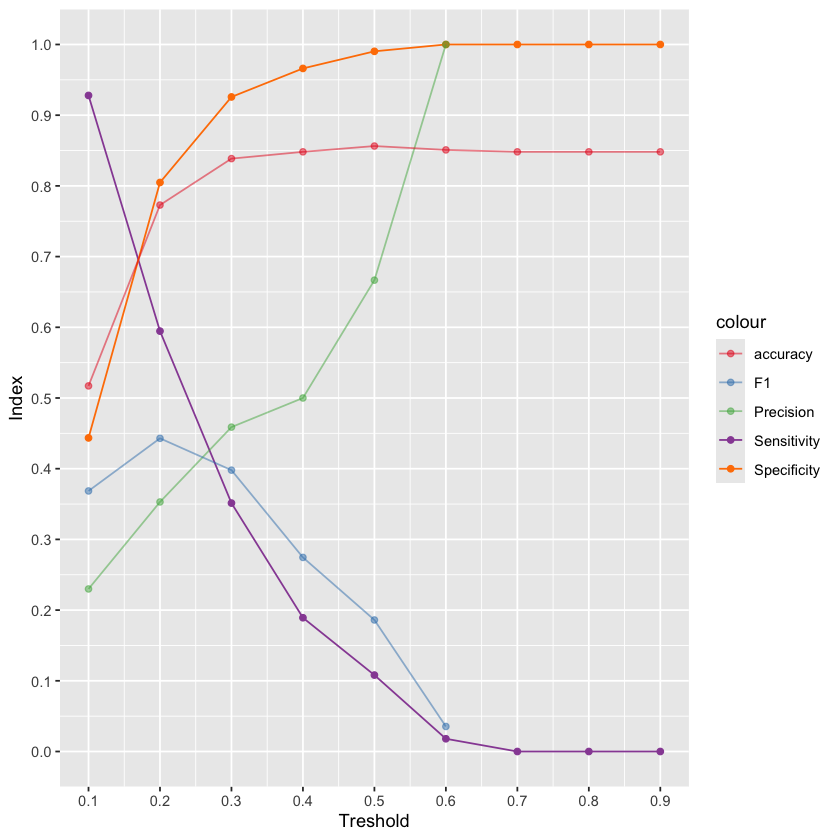

In [33]:
ggplot(data = index_df) +
        geom_line(aes(x = treshold, y = sensitivity, color = "Sensitivity")  ) +
        geom_point(aes(x = treshold, y = sensitivity, color = "Sensitivity")  ) +
        geom_line(aes(x = treshold, y = specificity, color = "Specificity") ) +
        geom_point(aes(x = treshold, y = specificity, color = "Specificity") ) + 
        geom_line(aes(x = treshold , y = precision, color = "Precision"), alpha = 0.5) + 
        geom_point(aes(x = treshold , y = precision, color = "Precision"), alpha = 0.5) + 
        geom_line(aes(x = treshold, y = F1, color = "F1"), alpha = 0.5) + 
        geom_point(aes(x = treshold, y = F1, color = "F1"), alpha = 0.5) + 
        geom_line(aes(x = treshold, y = accuracy, color = "accuracy"), alpha = 0.5) + 
        geom_point(aes(x = treshold, y = accuracy, color = "accuracy"), alpha = 0.5) + 
        scale_x_continuous(name="Treshold", limits=c(0.1, 0.9), breaks = t_seq) + 
        scale_y_continuous(name = "Index", limits = c(0,1), breaks = seq(0,1,0.1)) +
        scale_color_brewer(palette = "Set1") 

In [34]:
#install.packages("brglm")


In [35]:
library(brglm)

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


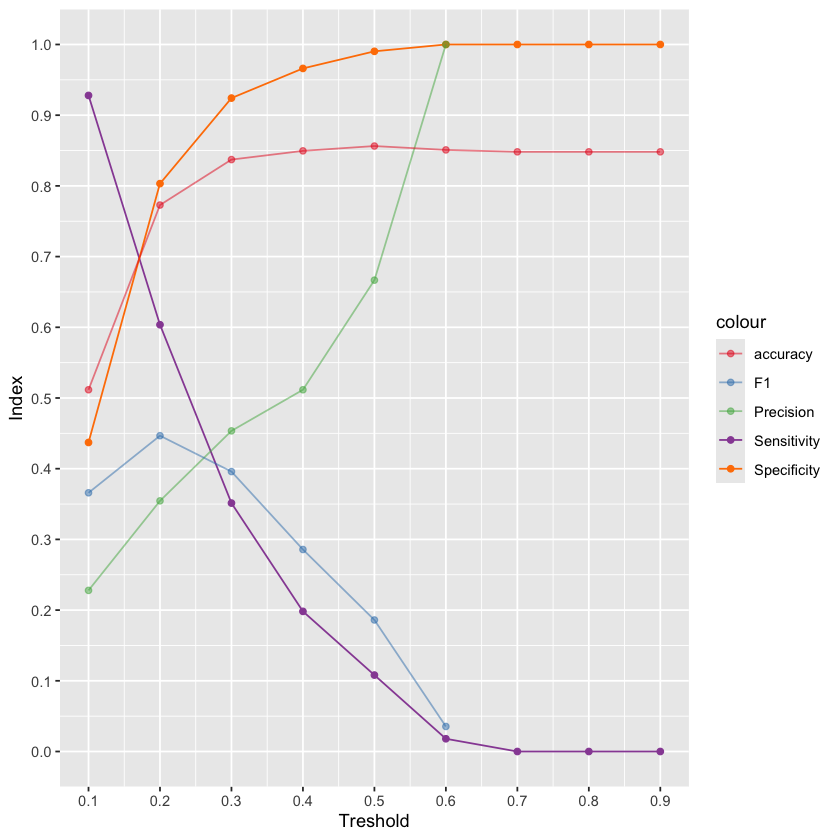

In [36]:
brglm_model <- brglm(formula = TenYearCHD ~ . , family = "binomial", data = train )
brglm_pred <- predict(object = brglm_model, newdata = test , type = "response")

# now the indices 
t_seq <- seq(0.1,0.9,by = 0.1)
index_mat <- matrix(ncol = 6 , nrow = length(t_seq))

counter <- 0 
for (treshold in t_seq ) {
        counter <- counter + 1 
       conf_mat <- table( test$TenYearCHD , factor(brglm_pred>treshold, levels = c("FALSE","TRUE"))) 
       sen <- conf_mat[2,2]/sum(conf_mat[2,])
       spec <- conf_mat[1,1]/sum(conf_mat[1,])
       prec <- conf_mat[2,2]/sum(conf_mat[,2])
       F1 <- (2*prec * sen)/(prec+sen)
       accuracy <- (conf_mat[1,1]+conf_mat[2,2])/sum(conf_mat)
       index_mat[counter,] <-  c(treshold,sen,spec,prec,F1,accuracy  )
       
       
        
}

index_df <- data.frame(index_mat)
colnames(index_df) <- c("treshold","sensitivity","specificity","precision","F1","accuracy")

ggplot(data = index_df) +
        geom_line(aes(x = treshold, y = sensitivity, color = "Sensitivity")  ) +
        geom_point(aes(x = treshold, y = sensitivity, color = "Sensitivity")  ) +
        geom_line(aes(x = treshold, y = specificity, color = "Specificity") ) +
        geom_point(aes(x = treshold, y = specificity, color = "Specificity") ) + 
        geom_line(aes(x = treshold , y = precision, color = "Precision"), alpha = 0.5) + 
        geom_point(aes(x = treshold , y = precision, color = "Precision"), alpha = 0.5) + 
        geom_line(aes(x = treshold, y = F1, color = "F1"), alpha = 0.5) + 
        geom_point(aes(x = treshold, y = F1, color = "F1"), alpha = 0.5) + 
        geom_line(aes(x = treshold, y = accuracy, color = "accuracy"), alpha = 0.5) + 
        geom_point(aes(x = treshold, y = accuracy, color = "accuracy"), alpha = 0.5) + 
        scale_x_continuous(name="Treshold", limits=c(0.1, 0.9), breaks = t_seq) + 
        scale_y_continuous(name = "Index", limits = c(0,1), breaks = seq(0,1,0.1)) +
        scale_color_brewer(palette = "Set1") 

In [37]:
table( test$TenYearCHD , brglm_pred>0.5) 


       
        FALSE TRUE
  FALSE   614    6
  TRUE     99   12

In [38]:
# Install logistf from CRAN
#install.packages("logistf")

# Or the development version from GitHub:
# install.packages("devtools")
#devtools::install_github("georgheinze/logistf")

In [39]:
library("logistf")

In [40]:
firth_model <- logistf(TenYearCHD ~ . , data=train)

betas <- coef(firth_model)
class(betas)

[1] "numeric"

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


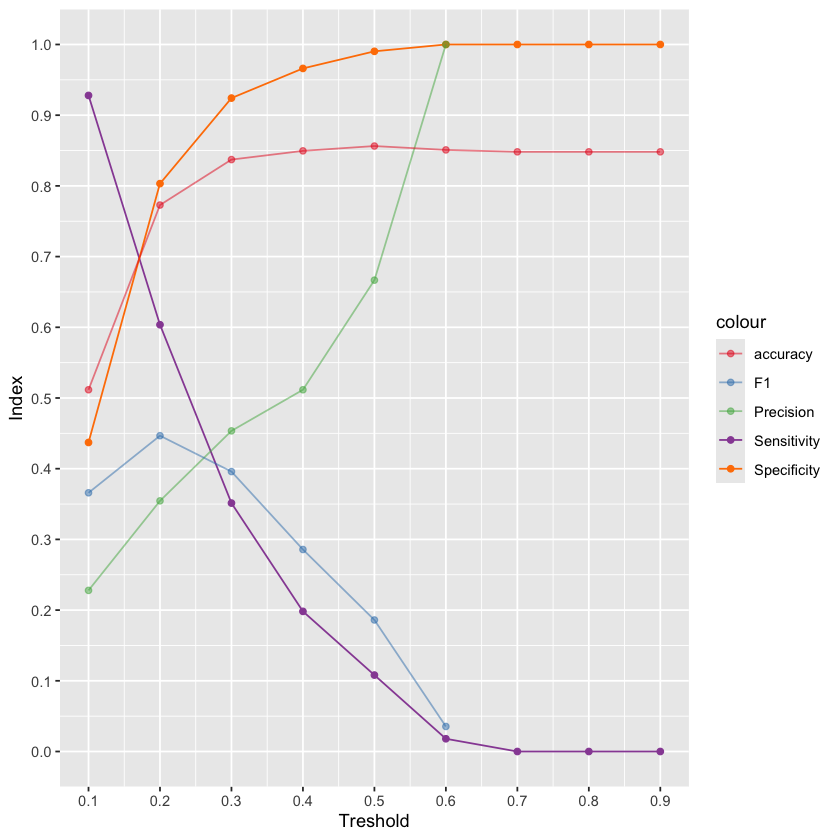

In [41]:
X <- model.matrix(firth_model, data=test)
probs <- 1 / (1 + exp(-X %*% betas))


t_seq <- seq(0.1,0.9,by = 0.1)
index_mat <- matrix(ncol = 6 , nrow = length(t_seq))

counter <- 0 
for (treshold in t_seq ) {
        counter <- counter + 1 
       conf_mat <- table( test$TenYearCHD , factor(probs>treshold, levels = c("FALSE","TRUE")) )  
       sen <- conf_mat[2,2]/sum(conf_mat[2,])
       spec <- conf_mat[1,1]/sum(conf_mat[1,])
       prec <- conf_mat[2,2]/sum(conf_mat[,2])
       F1 <- (2*prec * sen)/(prec+sen)
       accuracy <- (conf_mat[1,1]+conf_mat[2,2])/sum(conf_mat)
       index_mat[counter,] <-  c(treshold,sen,spec,prec,F1,accuracy  )
       
       
        
}

index_df <- data.frame(index_mat)
colnames(index_df) <- c("treshold","sensitivity","specificity","precision","F1","accuracy")

ggplot(data = index_df) +
        geom_line(aes(x = treshold, y = sensitivity, color = "Sensitivity")  ) +
        geom_point(aes(x = treshold, y = sensitivity, color = "Sensitivity")  ) +
        geom_line(aes(x = treshold, y = specificity, color = "Specificity") ) +
        geom_point(aes(x = treshold, y = specificity, color = "Specificity") ) + 
        geom_line(aes(x = treshold , y = precision, color = "Precision"), alpha = 0.5) + 
        geom_point(aes(x = treshold , y = precision, color = "Precision"), alpha = 0.5) + 
        geom_line(aes(x = treshold, y = F1, color = "F1"), alpha = 0.5) + 
        geom_point(aes(x = treshold, y = F1, color = "F1"), alpha = 0.5) + 
        geom_line(aes(x = treshold, y = accuracy, color = "accuracy"), alpha = 0.5) + 
        geom_point(aes(x = treshold, y = accuracy, color = "accuracy"), alpha = 0.5) + 
        scale_x_continuous(name="Treshold", limits=c(0.1, 0.9), breaks = t_seq) + 
        scale_y_continuous(name = "Index", limits = c(0,1), breaks = seq(0,1,0.1)) +
        scale_color_brewer(palette = "Set1") 


In [42]:
table( test$TenYearCHD , probs>0.5) 


       
        FALSE TRUE
  FALSE   614    6
  TRUE     99   12

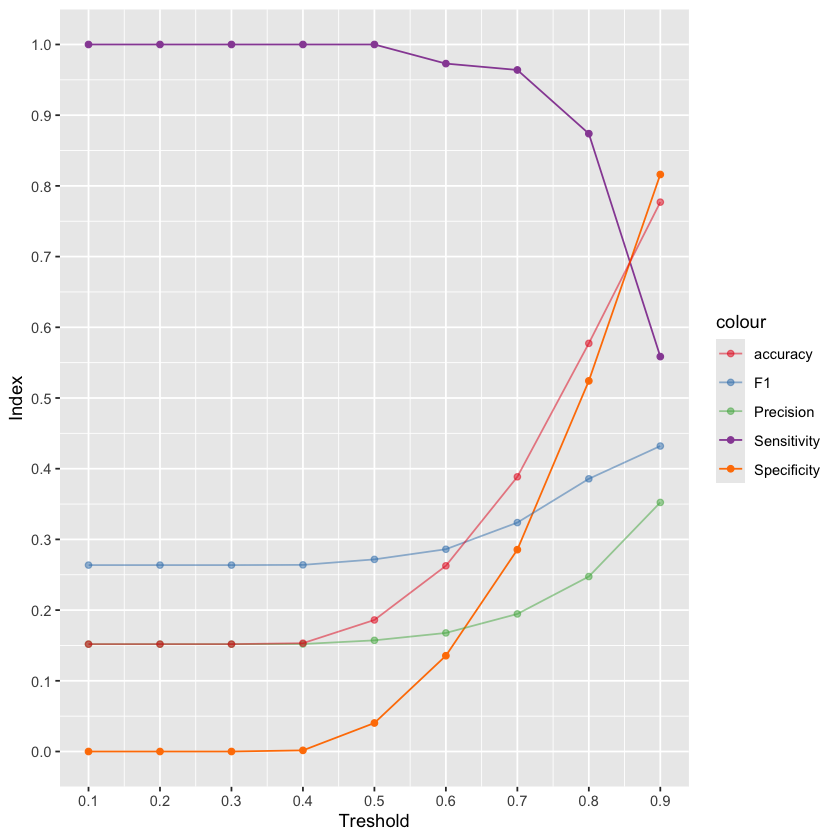

In [43]:
t <- train %>% filter(TenYearCHD == FALSE)

down_index <- sample(x = 1:nrow(t), size = table(train$TenYearCHD)[2] , replace = FALSE)
down_train <- rbind(t[down_index, ], train %>% filter(TenYearCHD == TRUE) ) 

proportion<- table(train$TenYearCHD)[2]/nrow(train)

#proportion <- train %>% summarise( sum(TenYearCHD==TRUE) / n())

down_model <- glm(data = down_train, formula = TenYearCHD ~ . , family = binomial)
betas <- coef(down_model)
betas[1] <- coef(down_model)[1] - log(proportion/(1-proportion))


X <- model.matrix(down_model, data=test)

probs <- 1 / (1 + exp(-X %*% betas))


#
t_seq <- seq(0.1,0.9,by = 0.1)
index_mat <- matrix(ncol = 6 , nrow = length(t_seq))

counter <- 0 
for (treshold in t_seq ) {
        counter <- counter + 1 
       conf_mat <- table( test$TenYearCHD , factor(probs>treshold, levels = c("FALSE","TRUE")) )  
       sen <- conf_mat[2,2]/sum(conf_mat[2,])
       spec <- conf_mat[1,1]/sum(conf_mat[1,])
       prec <- conf_mat[2,2]/sum(conf_mat[,2])
       F1 <- (2*prec * sen)/(prec+sen)
       accuracy <- (conf_mat[1,1]+conf_mat[2,2])/sum(conf_mat)
       index_mat[counter,] <-  c(treshold,sen,spec,prec,F1,accuracy  )
       
       
        
}

index_df <- data.frame(index_mat)
colnames(index_df) <- c("treshold","sensitivity","specificity","precision","F1","accuracy")

ggplot(data = index_df) +
        geom_line(aes(x = treshold, y = sensitivity, color = "Sensitivity")  ) +
        geom_point(aes(x = treshold, y = sensitivity, color = "Sensitivity")  ) +
        geom_line(aes(x = treshold, y = specificity, color = "Specificity") ) +
        geom_point(aes(x = treshold, y = specificity, color = "Specificity") ) + 
        geom_line(aes(x = treshold , y = precision, color = "Precision"), alpha = 0.5) + 
        geom_point(aes(x = treshold , y = precision, color = "Precision"), alpha = 0.5) + 
        geom_line(aes(x = treshold, y = F1, color = "F1"), alpha = 0.5) + 
        geom_point(aes(x = treshold, y = F1, color = "F1"), alpha = 0.5) + 
        geom_line(aes(x = treshold, y = accuracy, color = "accuracy"), alpha = 0.5) + 
        geom_point(aes(x = treshold, y = accuracy, color = "accuracy"), alpha = 0.5) + 
        scale_x_continuous(name="Treshold", limits=c(0.1, 0.9), breaks = t_seq) + 
        scale_y_continuous(name = "Index", limits = c(0,1), breaks = seq(0,1,0.1)) +
        scale_color_brewer(palette = "Set1") 

In [44]:
table( test$TenYearCHD , probs>0.5) 


       
        FALSE TRUE
  FALSE    25  595
  TRUE      0  111

In [45]:
set.seed(8)

 n = 500 
 train <- data.frame(train)
 test <- data.frame(test)
 rf_model <- randomForest( formula = TenYearCHD ~ . ,
                                               ntree = n, x = train[,-16] ,
                                               y = factor(train[,16]), 
                                               xtest = test[,-16], ytest = factor(test[,16]) )
rf_model
## 


Call:
 randomForest(x = train[, -16], y = factor(train[, 16]), xtest = test[,      -16], ytest = factor(test[, 16]), ntree = n, formula = TenYearCHD ~      .) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 15.2%
Confusion matrix:
      FALSE TRUE class.error
FALSE  2465   16 0.006449012
TRUE    429   17 0.961883408
                Test set error rate: 15.46%
Confusion matrix:
      FALSE TRUE class.error
FALSE   613    7  0.01129032
TRUE    106    5  0.95495495